In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing useful libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import mplfinance as mpf

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [ ]:
import yfinance as yf


In [ ]:
#Make the dataframe
ticker = yf.Ticker("TCS.NS")
data = ticker.history(period = 'max')
tcs = pd.DataFrame.from_dict(data)
tcs.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12 00:00:00+05:30,28.348282,29.281635,28.348282,29.062023,212976,0.0,0.0
2002-08-13 00:00:00+05:30,29.098599,29.565275,28.458063,28.668524,153576,0.0,0.0
2002-08-14 00:00:00+05:30,28.732600,28.732600,26.152155,26.692038,822776,0.0,0.0
2002-08-15 00:00:00+05:30,26.692038,26.692038,26.692038,26.692038,0,0.0,0.0
2002-08-16 00:00:00+05:30,26.554776,27.817545,26.170454,26.627979,811856,0.0,0.0


In [ ]:
#Printing info of the data 
tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5071 entries, 2002-08-12 00:00:00+05:30 to 2023-01-06 00:00:00+05:30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5071 non-null   float64
 1   High          5071 non-null   float64
 2   Low           5071 non-null   float64
 3   Close         5071 non-null   float64
 4   Volume        5071 non-null   int64  
 5   Dividends     5071 non-null   float64
 6   Stock Splits  5071 non-null   float64
 7   SMA20         5052 non-null   float64
 8   SMA50         5022 non-null   float64
 9   Signal        5071 non-null   int64  
 10  Position      5070 non-null   float64
 11  Buy           57 non-null     float64
 12  Sell          57 non-null     float64
dtypes: float64(11), int64(2)
memory usage: 683.7 KB


**Data Visualization of Stocks**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f482328da60>,
      dtype=object)

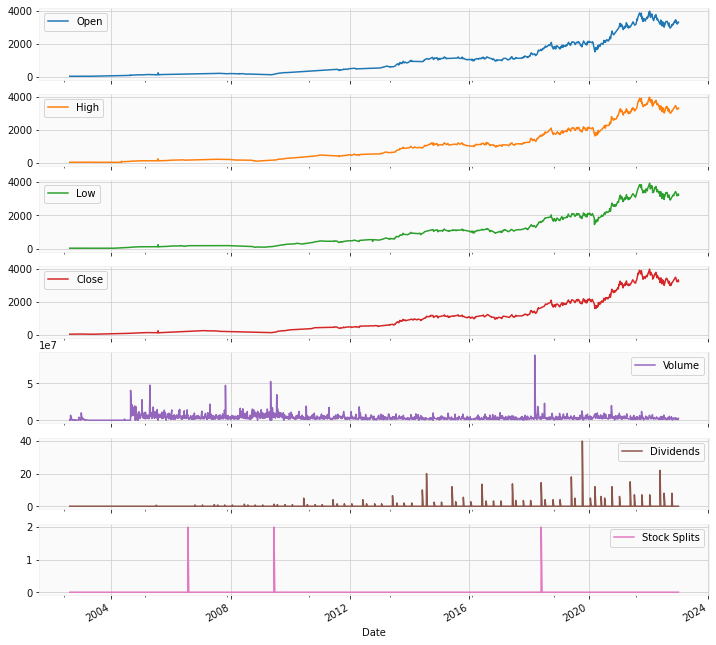

In [ ]:
#Historical Plotting of Stocks
hist = ticker.history(period = 'max')
hist.plot(kind = 'line', figsize = (12,12), subplots = True)

Text(0, 0.5, 'Close Price')

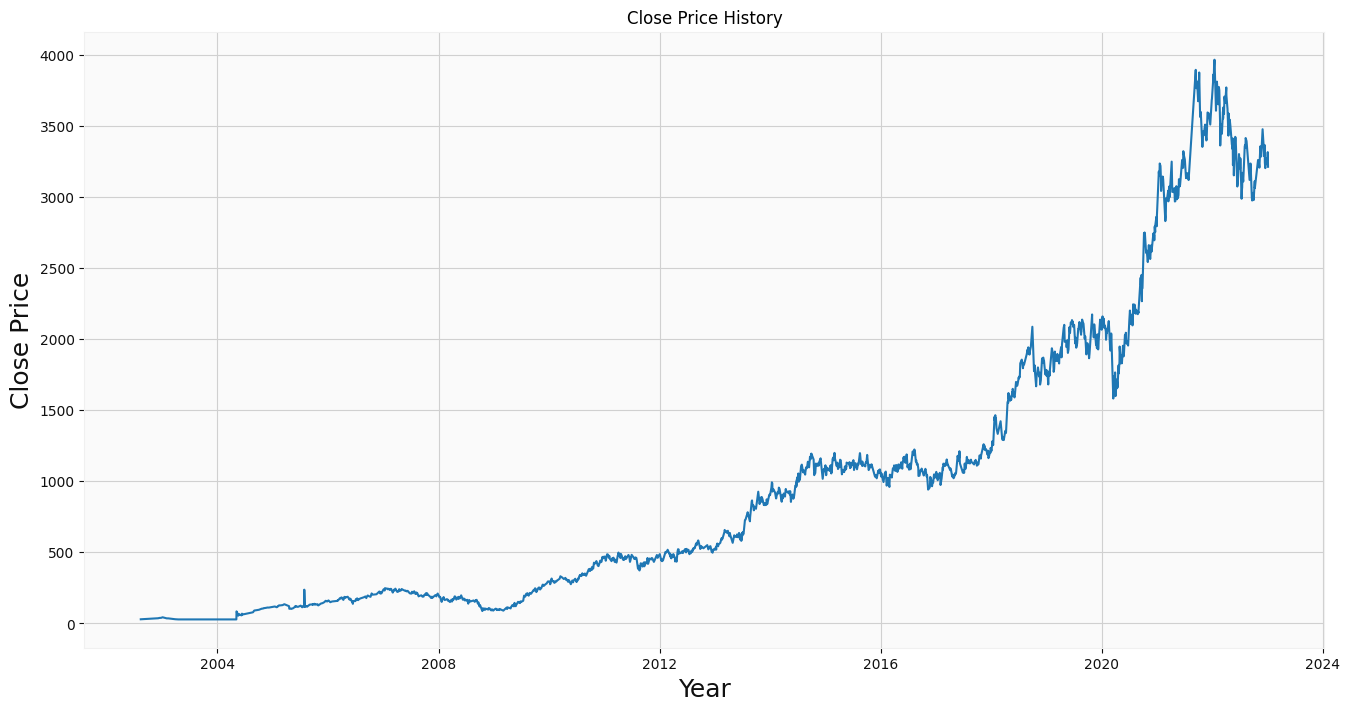

In [241]:
#Close Price History
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(tcs['Close'])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)

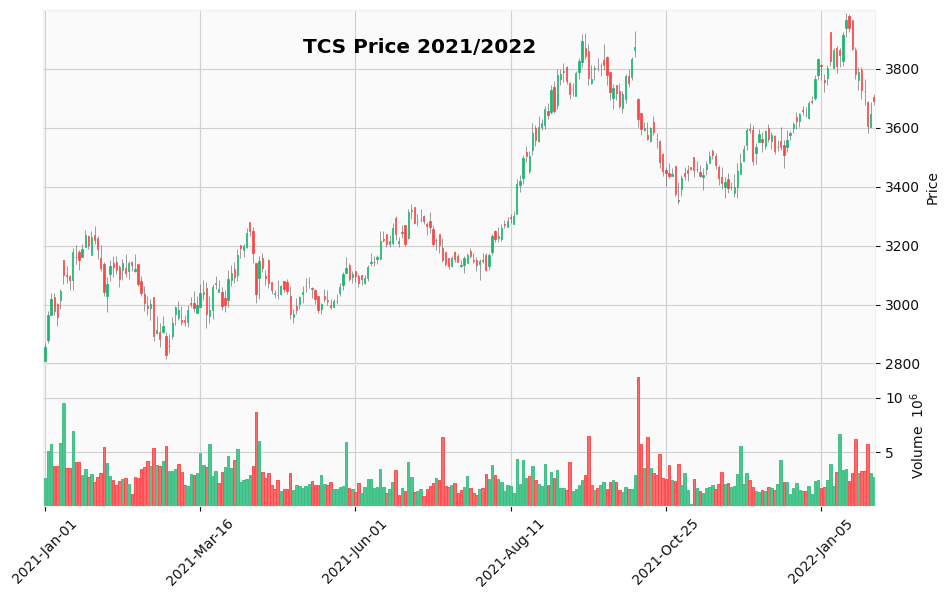

In [ ]:
#Pricing from 2021 - 2022, using candle plotting
mpf.plot(tcs['2021-01':'2022-01'], figratio = (25,15), type = 'candle', title = 'TCS Price 2021/2022' ,volume = True, tight_layout = True, style = 'yahoo')

Simple Moving Average (SMA)

In [ ]:
#creating function for SMA
def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
# Creating new columns to store 20 day and 50 day SMA
tcs['SMA20'] = SMA(tcs,20)
tcs['SMA50'] = SMA(tcs,50)

In [ ]:
#Get the buy and Sell Signals
tcs['Signal'] = np.where(tcs['SMA20']>tcs['SMA50'],1,0)
tcs['Position'] = tcs['Signal'].diff()

tcs['Buy'] = np.where(tcs['Position'] == 1, tcs['Close'], np.NAN )
tcs['Sell'] = np.where(tcs['Position'] == -1, tcs['Close'], np.NAN )

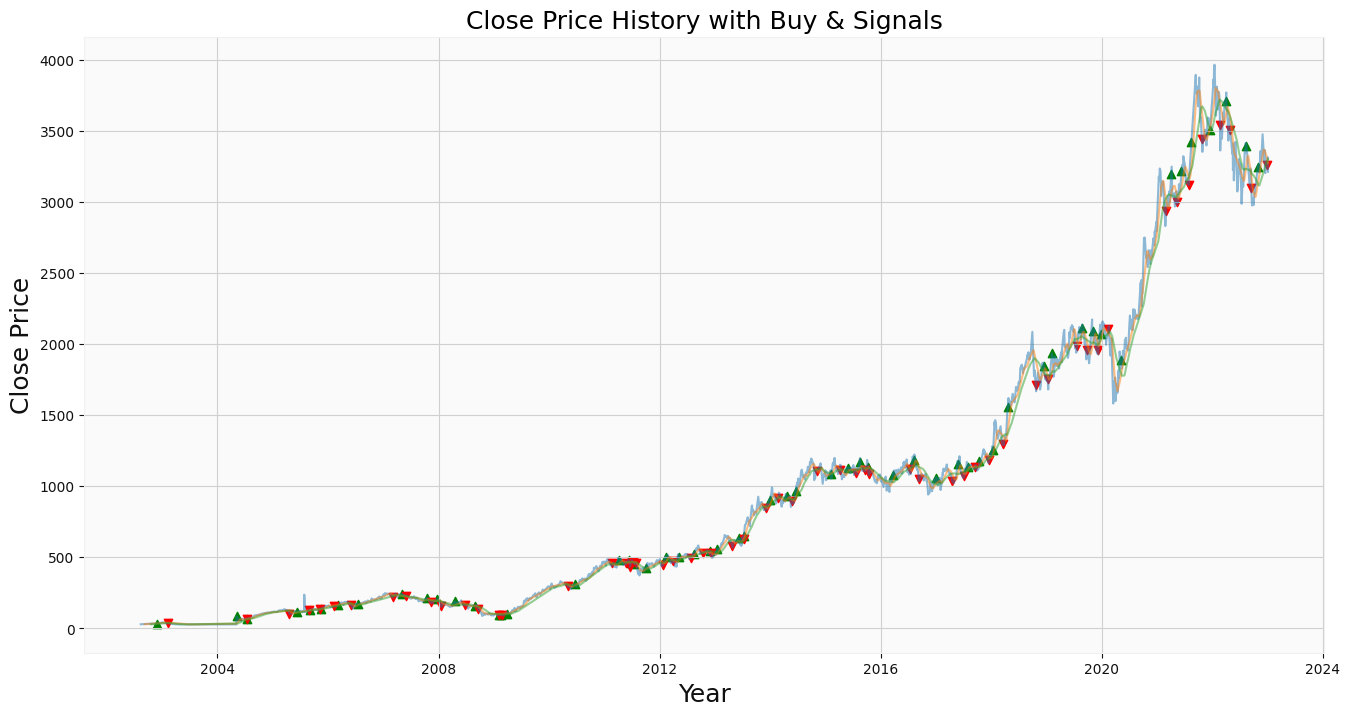

In [240]:
#Visually showing the close price wuth SMAs and Buy & Sell Signal

plt.figure(figsize = (16,8))
plt.title('Close Price History with Buy & Signals', fontsize = 18)
plt.plot(tcs['Close'], alpha = 0.5, label = 'Close')
plt.plot(tcs['SMA20'], alpha = 0.5, label = 'SMA20')
plt.plot(tcs['SMA50'], alpha = 0.5, label = 'SMA50')
plt.scatter(tcs.index, tcs['Buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(tcs.index, tcs['Sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'red')
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

**Data Visualisation & Machine Learning**

In [ ]:
#Correlation Matrix
ticker2 = yf.Ticker("TCS.NS")
data2 = ticker2.history(period = 'max')
tcs2 = pd.DataFrame.from_dict(data2)
tcs2.head()
corr_matrix = tcs2.corr()
corr_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999916,0.999915,0.999825,-0.107985,0.059234,-0.007799
High,0.999916,1.000000,0.999904,0.999931,-0.106100,0.059333,-0.007705
Low,0.999915,0.999904,1.000000,0.999926,-0.109489,0.058778,-0.007732
Close,0.999825,0.999931,0.999926,1.000000,-0.107859,0.058847,-0.007738
Volume,-0.107985,-0.106100,-0.109489,-0.107859,1.000000,-0.002078,0.006637
Dividends,0.059234,0.059333,0.058778,0.058847,-0.002078,1.000000,0.131706
Stock Splits,-0.007799,-0.007705,-0.007732,-0.007738,0.006637,0.131706,1.000000


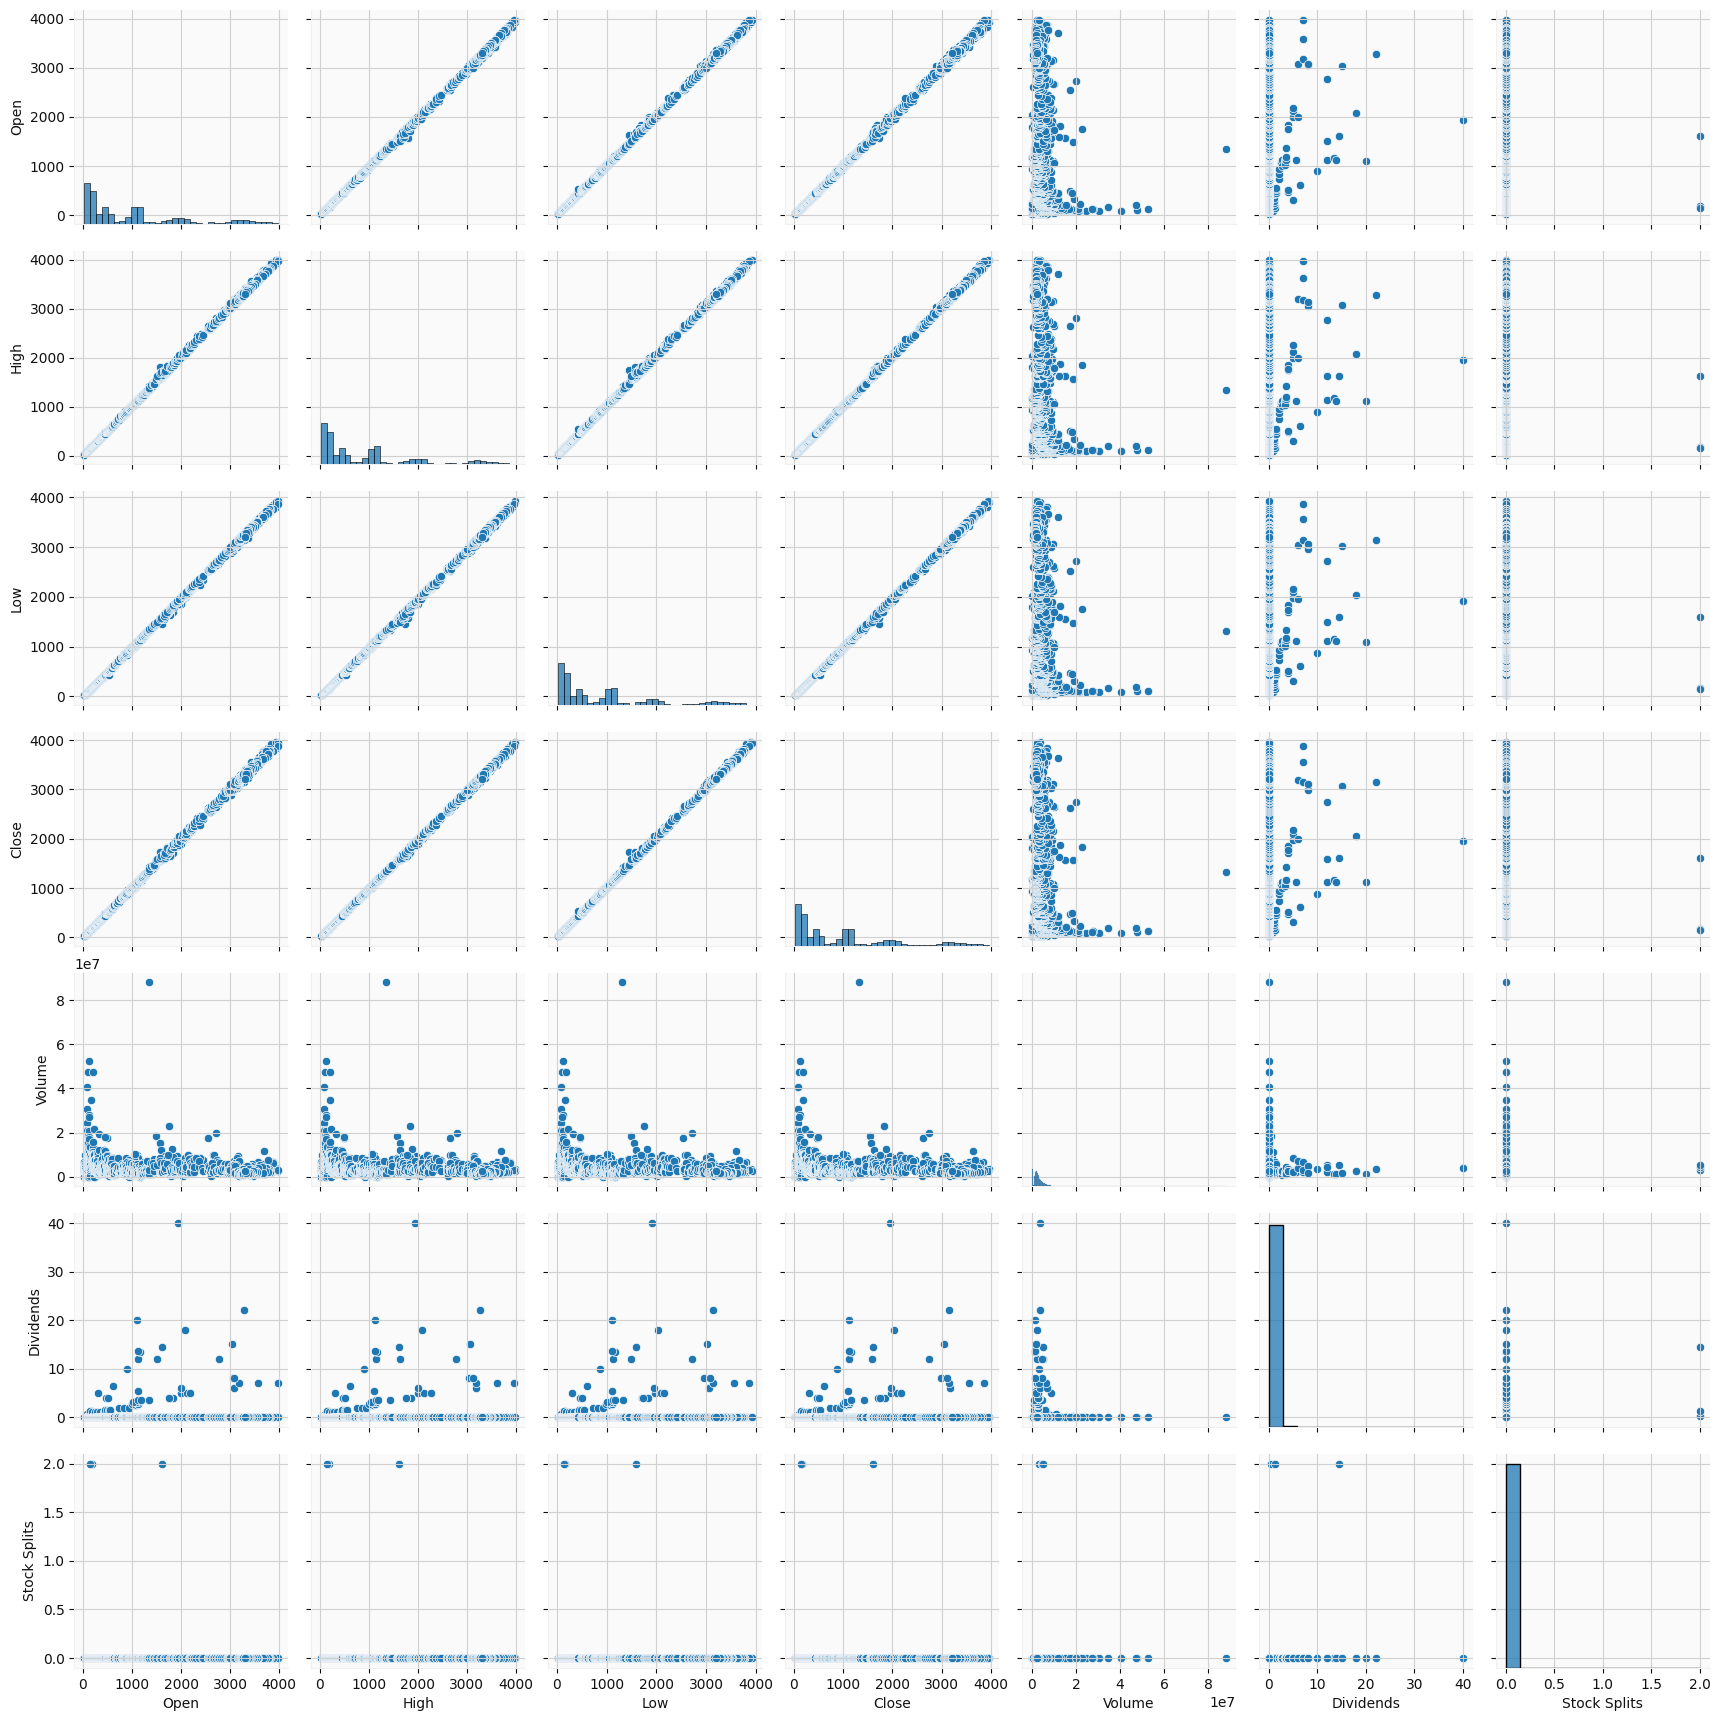

In [ ]:
sns.pairplot(tcs2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



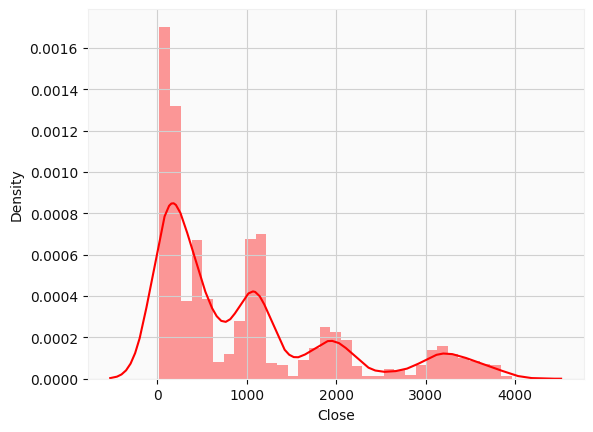

In [ ]:
sns.distplot(tcs2['Close'], color = 'red')

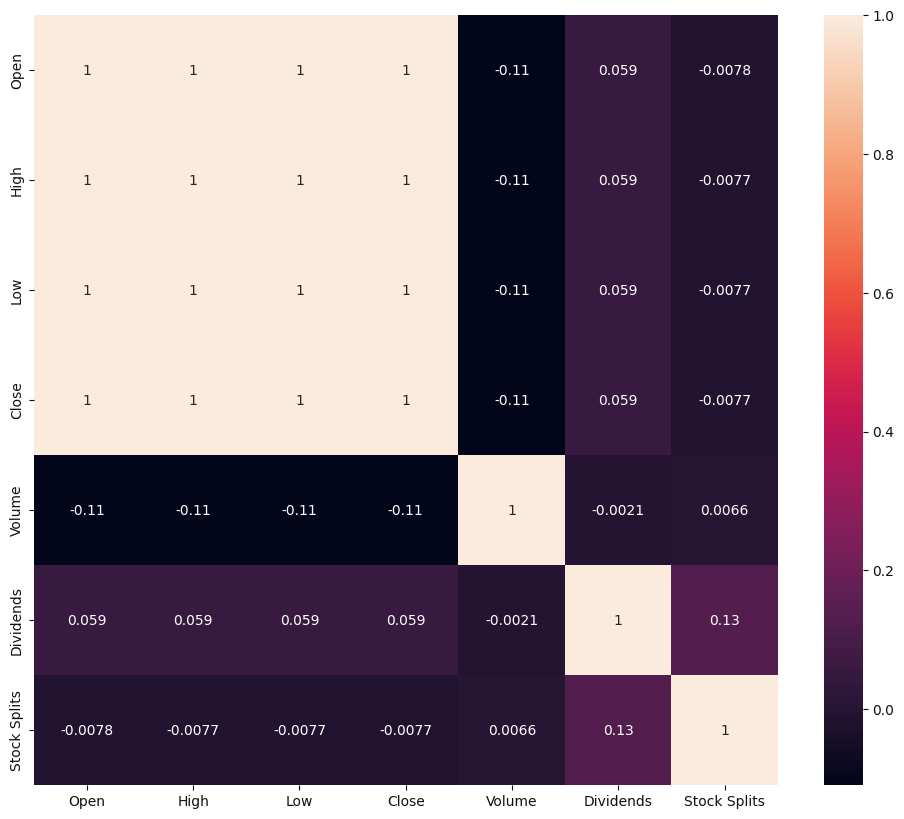

In [ ]:
#Correlation Using Heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot = True)

<Figure size 1200x1000 with 0 Axes>

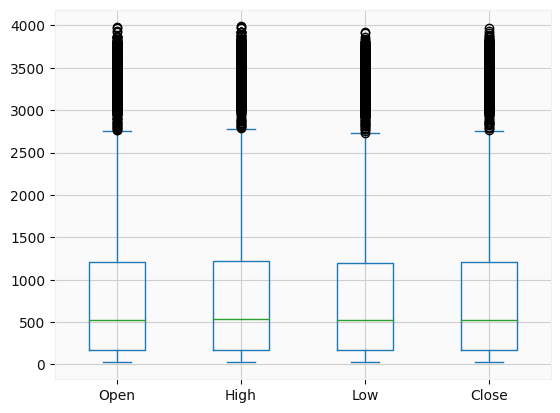

In [ ]:
#Checking the Outliers
plt.figure(figsize = (12,10))
tcs[['Open','High','Low','Close']].plot(kind = 'box')

# Prediction using Random Forest Regressor

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


We will be predicting the Close price of stocks, here the X will be 'Open','High','Low','Volume' and y will be 'Close'

In [ ]:

X = tcs2[['Open','High','Low','Volume']]
y = tcs2['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [ ]:
X

,Open,High,Low,Volume
Date,,,,
2002-08-12 00:00:00+05:30,28.348274,29.281627,28.348274,212976
2002-08-13 00:00:00+05:30,29.098616,29.565292,28.458080,153576
2002-08-14 00:00:00+05:30,28.732592,28.732592,26.152148,822776
2002-08-15 00:00:00+05:30,26.692030,26.692030,26.692030,0
2002-08-16 00:00:00+05:30,26.554765,27.817533,26.170443,811856
...,...,...,...,...
2023-01-02 00:00:00+05:30,3261.000000,3266.850098,3235.199951,709547
2023-01-03 00:00:00+05:30,3252.000000,3320.000000,3245.300049,1245178
2023-01-04 00:00:00+05:30,3306.699951,3327.350098,3286.199951,1231668


In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
model = RandomForestRegressor()
mymodel = model.fit(X_train,y_train)

In [ ]:
pred_y = mymodel.predict(X_test)

In [ ]:
r2_score(pred_y, y_test)

0.999903850638007

Text(0, 0.5, 'Predicted Y')

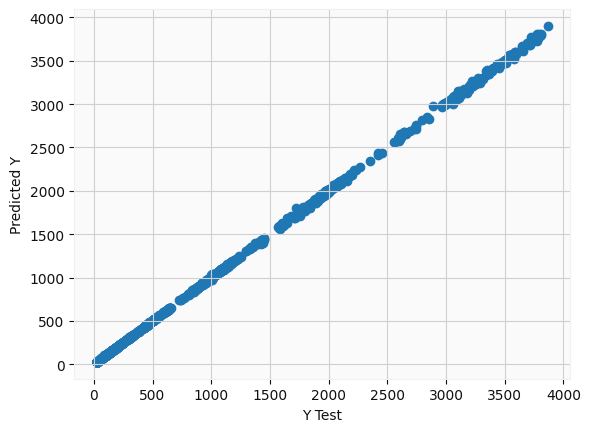

In [ ]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print("Actual Price of Share", y_test[0])
print("Predicted Price of Share", pred_y[0])

Actual Price of Share 109.79856872558594
Predicted Price of Share 110.80491729736327


**Actual Price of Stock is 109.79856872558594 and Predicted Price of Share is 110.53240264892578** 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



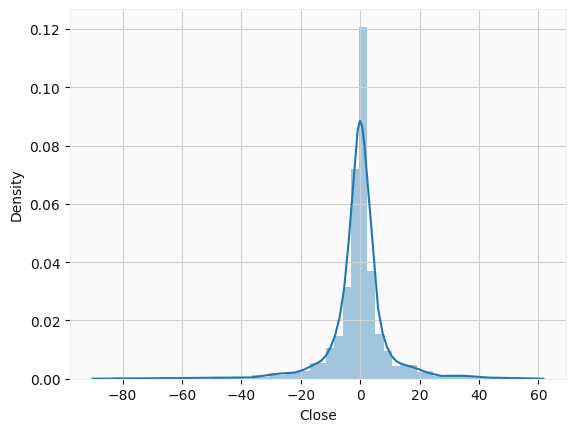

In [ ]:
sns.distplot((y_test-pred_y),bins=50);

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

MAE: 5.464044133924467
MSE: 96.86105070200884
RMSE: 9.841801191957133


**This is done using done using Random Forest Regressor, still it is giving good results here we can also use LSTM for better forecast of predictions**